In [1]:
import torchvision
from torchvision.transforms import transforms
import torch


transforms_train = transforms.Compose([
    transforms.RandomChoice([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(180),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        ]),
    transforms.ToTensor(),
])

dataset = torchvision.datasets.MNIST(root='./data/MNIST', train=True, download=True, transform=transforms_train)
dataset2 = torchvision.datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transforms_train)
dataset3 = torchvision.datasets.CIFAR100(root='./data/cifar100', train=True, download=True, transform=transforms_train)
dataset4 = torchvision.datasets.FashionMNIST(root='./data/fmnist', train=True, download=True, transform=transforms_train)

torch.save(dataset, "aug_mnist.pt")
torch.save(dataset2, "aug_cifar10.pt")
torch.save(dataset3, "aug_cifar100.pt")
torch.save(dataset4, "aug_fmnist.pt")


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Files already downloaded and verified


[18.133333206176758, 26.866666793823242, 33.46060562133789, 37.18181610107422, 38.27878952026367, 45.07878875732422, 47.957576751708984, 48.67878723144531, 51.20000076293945, 52.503028869628906, 53.90303039550781, 57.61212158203125, 58.15757369995117, 60.87272644042969, 63.133331298828125, 63.133331298828125, 63.133331298828125, 64.96969604492188, 64.96969604492188, 64.96969604492188, 64.96969604492188, 64.98181915283203, 64.98181915283203, 64.98181915283203, 66.30303192138672, 66.53939056396484, 66.53939056396484, 66.53939056396484, 66.67878723144531, 66.67878723144531, 66.7757568359375, 67.53939056396484, 67.53939056396484, 67.53939056396484, 67.53939056396484, 68.07272338867188, 68.29696655273438, 68.29696655273438, 68.29696655273438, 68.76363372802734, 68.76363372802734, 68.76363372802734, 68.9454574584961, 68.9454574584961, 69.52727508544922, 69.52727508544922, 69.52727508544922, 69.52727508544922, 70.01212310791016, 70.01212310791016, 70.01212310791016, 70.19393920898438, 70.1939

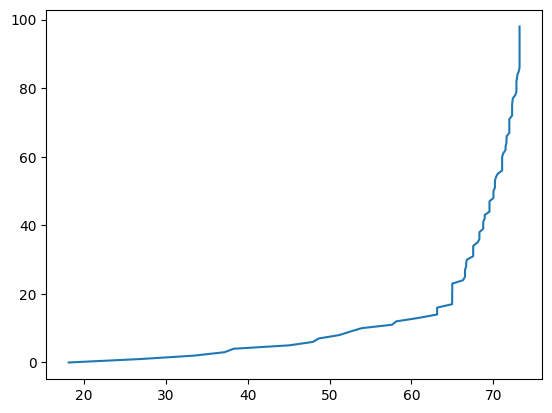

In [9]:
import matplotlib.pyplot as plt
import re

f = open("resnet-cifar100.txt", "r")

f_lines = f.readlines()
result = []
rang = [i for i in range(99)]
for i in f_lines:
    if "Accuracy" in i:
        if len(result) != 0:
            if result[-1] > float(re.findall("\d+.\d+",i)[0]):
                result.append(result[-1])
            else:
                result.append(float(re.findall("\d+.\d+",i)[0]))
        else:
            result.append(float(re.findall("\d+.\d+",i)[0]))
print(result)
print(rang)
plt.plot(rang, result)
